In [3]:
import os
import pickle
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D, Conv2D, Dropout
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

In [4]:
def load_img_and_transfer(img_path, target_size=(224, 224), im_show=False):
    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    if im_show:
        plt.imshow(img)
        plt.show()
    return x

In [6]:
base_model=MobileNet(weights='imagenet',include_top=False)
x=base_model.output
x=GlobalAveragePooling2D()(x)
# x=Dense(1024,activation='relu')(x)
# x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
x=Dropout(rate=0.3)(x)
preds=Dense(2,activation='softmax')(x)

In [7]:
model=Model(inputs=base_model.input,outputs=preds)

In [8]:
# Fix the weights for all layers except the last one
for layer in model.layers[:-3]:
    layer.trainable=False

In [9]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
img_datagen=ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.3) #included in our dependencies

train_generator=img_datagen.flow_from_directory('./data/raw',
                                                target_size=(224,224),
                                                color_mode='rgb',
                                                batch_size=64,
                                                class_mode='categorical',
                                                shuffle=True,
                                                subset='training')

Found 797 images belonging to 2 classes.


In [12]:
test_generator=img_datagen.flow_from_directory('./data/raw',
                                               target_size=(224,224),
                                               color_mode='rgb',
                                               batch_size=64,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='validation')

Found 340 images belonging to 2 classes.


In [13]:
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

# TODO: increase epochs to 50, 100, 1000
step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator,
                              validation_data=test_generator,
                              steps_per_epoch=step_size_train,
                              epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
12/12 [==============================] - 28s 2s/step - loss: 0.4081 - accuracy: 0.8308 - val_loss: 0.0342 - val_accuracy: 0.9618
Epoch 2/100
12/12 [==============================] - 28s 2s/step - loss: 0.2232 - accuracy: 0.9168 - val_loss: 0.0268 - val_accuracy: 0.9471
Epoch 3/100
12/12 [==============================] - 28s 2s/step - loss: 0.1907 - accuracy: 0.9222 - val_loss: 0.2114 - val_accuracy: 0.9706
Epoch 4/100
12/12 [==============================] - 28s 2s/step - loss: 0.1713 - accuracy: 0.9304 - val_loss: 0.1361 - val_accuracy: 0.9500
Epoch 5/100
12/12 [==============================] - 28s 2s/step - loss: 0.0815 - accuracy: 0.9727 - val_loss: 0.1192 - val_accuracy: 0.9559
Epoch 6/100
12/12 [==============================] - 29s 2s/step - loss: 0.0560 - accuracy: 0.9754 - val_loss: 0.0325 - val_accuracy: 0.9618
Epoch 7/100
12/12 [==============================] - 29s 2s/step - loss: 0.0430 - accuracy: 0.9870 - val_l

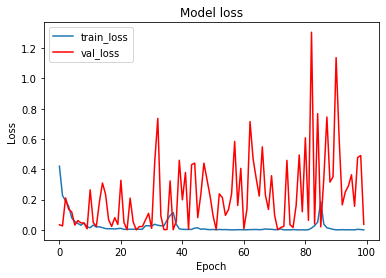

In [14]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], 'r', label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

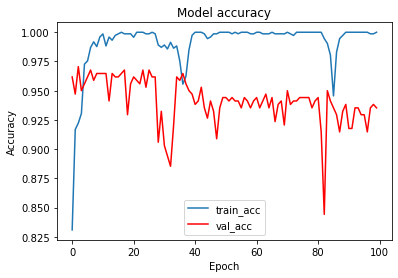

In [15]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], 'r', label='val_acc')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [53]:
# Save weights of the model
model.save_weights('tree-classifier.h5')

# Image Augmentation

In [29]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rotation_range=40,
                                   brightness_range=(0.7,1.3),
                                   zoom_range=0.2) #included in our dependencies

train_generator = train_datagen.flow_from_directory('./train',
                                                    target_size=(224,224),
                                                    color_mode='rgb',
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 290 images belonging to 2 classes.


In [30]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
test_generator = test_datagen.flow_from_directory('./test',
                                                  target_size=(224,224),
                                                  color_mode='rgb',
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  shuffle=True)

Found 84 images belonging to 2 classes.


In [48]:
step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator,
                              validation_data=test_generator,
                              steps_per_epoch=step_size_train,
                              epochs=100)

Epoch 1/100
9/9 [==============================] - 20s 2s/step - loss: 0.5250 - accuracy: 0.9690 - val_loss: 0.0194 - val_accuracy: 0.9762
Epoch 2/100
9/9 [==============================] - 18s 2s/step - loss: 0.1311 - accuracy: 0.9444 - val_loss: 0.0374 - val_accuracy: 0.9762
Epoch 3/100
9/9 [==============================] - 16s 2s/step - loss: 0.1664 - accuracy: 0.9781 - val_loss: 0.2284 - val_accuracy: 0.9048
Epoch 4/100
9/9 [==============================] - 19s 2s/step - loss: 0.1157 - accuracy: 0.9583 - val_loss: 0.0505 - val_accuracy: 0.9167
Epoch 5/100
9/9 [==============================] - 16s 2s/step - loss: 0.0855 - accuracy: 0.9690 - val_loss: 0.0427 - val_accuracy: 0.9524
Epoch 6/100
9/9 [==============================] - 18s 2s/step - loss: 0.4879 - accuracy: 0.9225 - val_loss: 0.0214 - val_accuracy: 0.9881
Epoch 7/100
9/9 [==============================] - 16s 2s/step - loss: 0.2185 - accuracy: 0.8953 - val_loss: 0.1256 - val_accuracy: 0.9524
Epoch 8/100
9/9 [==========

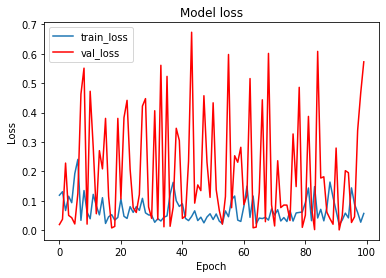

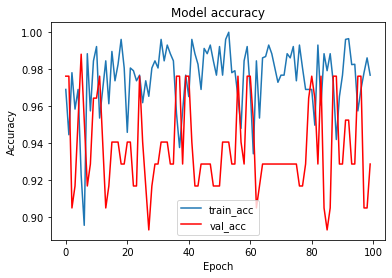

In [56]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], 'r', label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], 'r', label='val_acc')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [59]:
with open('history/img_aug', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

# Make More Layers Trainable

In [75]:
model=Model(inputs=base_model.input,outputs=preds)

In [76]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128 

In [79]:
n_trainable_layers = 9

for layer in model.layers[:-n_trainable_layers]:
    layer.trainable=False

In [80]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
img_datagen=ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.3) #included in our dependencies

train_generator=img_datagen.flow_from_directory('./leaf',
                                                target_size=(224,224),
                                                color_mode='rgb',
                                                batch_size=128,
                                                class_mode='categorical',
                                                shuffle=True,
                                                subset='training')

Found 243 images belonging to 2 classes.


In [67]:
test_generator=img_datagen.flow_from_directory('./leaf',
                                               target_size=(224,224),
                                               color_mode='rgb',
                                               batch_size=64,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='validation')

Found 102 images belonging to 2 classes.


In [81]:
step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator,
                              validation_data=test_generator,
                              steps_per_epoch=step_size_train,
                              epochs=25)

Epoch 1/25
1/1 [==============================] - 13s 13s/step - loss: 1.1302 - accuracy: 0.4844 - val_loss: 0.1745 - val_accuracy: 0.9118
Epoch 2/25
1/1 [==============================] - 8s 8s/step - loss: 0.3104 - accuracy: 0.9043 - val_loss: 0.1811 - val_accuracy: 0.9314
Epoch 3/25
1/1 [==============================] - 9s 9s/step - loss: 0.0324 - accuracy: 0.9922 - val_loss: 0.1272 - val_accuracy: 0.8824
Epoch 4/25
1/1 [==============================] - 8s 8s/step - loss: 0.0603 - accuracy: 0.9739 - val_loss: 0.1853 - val_accuracy: 0.8922
Epoch 5/25
1/1 [==============================] - 8s 8s/step - loss: 0.0295 - accuracy: 0.9913 - val_loss: 0.3912 - val_accuracy: 0.8333
Epoch 6/25
1/1 [==============================] - 10s 10s/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.6540 - val_accuracy: 0.7647
Epoch 7/25
1/1 [==============================] - 9s 9s/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.3364 - val_accuracy: 0.7549
Epoch 8/25
1/1 [=====================

KeyboardInterrupt: 

In [1]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], 'r', label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], 'r', label='val_acc')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

# Human Judgement on the Prediction Results

In [22]:
train_generator.class_indices

{'coniferous_leaf': 0, 'deciduous_leaf': 1}

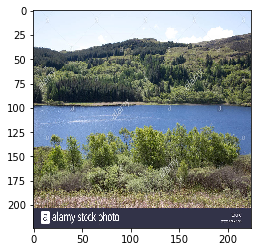

[0.9895822  0.01041785]


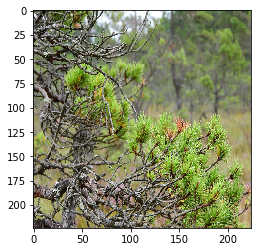

[9.9991846e-01 8.1575010e-05]


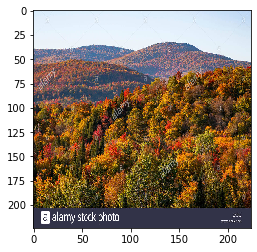

[0.99694544 0.0030546 ]


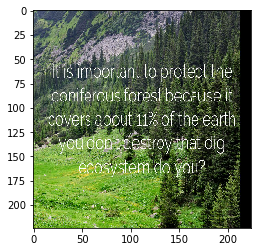

[9.9990547e-01 9.4567709e-05]


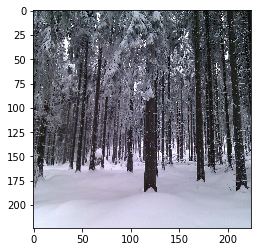

[0.9961106  0.00388934]


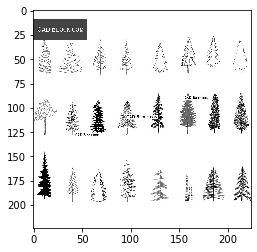

[0.9321395  0.06786049]


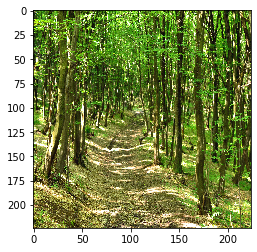

[0.97798675 0.0220132 ]


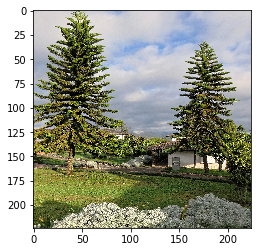

[9.996244e-01 3.756147e-04]


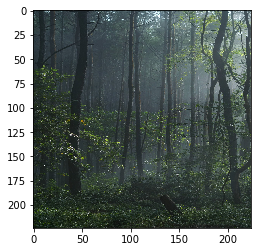

[0.89585215 0.1041479 ]


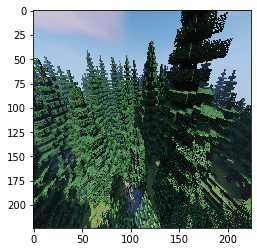

[0.75720954 0.24279052]


In [63]:
p = Path('./images/coniferous_tree/')
img_paths = list(p.glob('*.jpg'))
for path in img_paths[:10]:
    x = load_img_and_transfer(path, im_show=True)
    preds = model.predict(x)
    print(preds[0])

# TODO
* Output image patterns
* Make more layer trainable
* Try a different model architecture
* Replace the output layer only
* Try other weights (imagenet is currently used)
* Tune learning rate of the optimizer